<a href="https://colab.research.google.com/github/mmfara/Data-Science-ML-Projects/blob/main/Auto_MPG_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Auto-MPG dataset is a classic dataset often used for machine learning and regression tasks. It contains information about various automobile attributes and is widely used to predict fuel efficiency (miles per gallon or "mpg") based on these attributes. The dataset was originally compiled by the U.S. Environmental Protection Agency (EPA) and published in 1983

#Goals of the Dataset
The primary task is regression, where the goal is to predict the mpg value based on the other attributes.

It can also be used for exploratory data analysis (EDA), feature engineering, or multicollinearity analysis.

Attributes in the Dataset
The dataset has 398 rows (instances) and 8 attributes (columns):

| **Attribute**   | **Description**                                                                                       |
|------------------|-------------------------------------------------------------------------------------------------------|
| **mpg**         | Miles per gallon (target variable)                                                                   |
| **cylinders**   | Number of cylinders in the engine (e.g., 4, 6, 8)                                                    |
| **displacement**| Engine displacement in cubic inches                                                                   |
| **horsepower**  | Engine horsepower (power of the engine)                                                              |
| **weight**      | Weight of the car in pounds                                                                          |
| **acceleration**| Acceleration time (time to accelerate from 0 to 60 mph in seconds)                                   |
| **model year**  | Model year of the car (e.g., 70 for 1970, 80 for 1980)                                               |
| **origin**      | Country of origin of the car (1 = USA, 2 = Europe, 3 = Japan)                                        |
| **car name**    | Name of the car (e.g., "chevrolet chevelle malibu") (often excluded in machine learning tasks)         |


In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
df = pd.read_csv('/content/auto-mpg.csv')

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
df.shape

(398, 9)

In [5]:
df['origin'] = df['origin'].replace({1:'america',2:'europe',3:'japan'})

In [6]:
df = df.drop('car name', axis=1)

In [7]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,america
1,15.0,8,350.0,165,3693,11.5,70,america
2,18.0,8,318.0,150,3436,11.0,70,america
3,16.0,8,304.0,150,3433,12.0,70,america
4,17.0,8,302.0,140,3449,10.5,70,america
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,america
394,44.0,4,97.0,52,2130,24.6,82,europe
395,32.0,4,135.0,84,2295,11.6,82,america
396,28.0,4,120.0,79,2625,18.6,82,america


In [8]:
df.isna().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model year,0
origin,0


In [9]:
df.dtypes

,0
mpg,float64
cylinders,int64
displacement,float64
horsepower,object
weight,int64
acceleration,float64
model year,int64
origin,object


In [10]:
#Checking which values are digits
hpIsDigit = pd.DataFrame(df.horsepower.str.isdigit())

In [11]:
hpIsDigit[hpIsDigit['horsepower']==False]

,horsepower
32,False
126,False
330,False
336,False
354,False
374,False


In [12]:
df[hpIsDigit['horsepower']==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,?,2046,19.0,71,america
126,21.0,6,200.0,?,2875,17.0,74,america
330,40.9,4,85.0,?,1835,17.3,80,europe
336,23.6,4,140.0,?,2905,14.3,80,america
354,34.5,4,100.0,?,2320,15.8,81,europe
374,23.0,4,151.0,?,3035,20.5,82,america


In [13]:
df.iloc[32]

,32
mpg,25.0
cylinders,4
displacement,98.0
horsepower,?
weight,2046
acceleration,19.0
model year,71
origin,america


In [14]:
df = df.replace('?',np.nan)

In [15]:
df[hpIsDigit['horsepower']==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,NaN,2046,19.0,71,america
126,21.0,6,200.0,NaN,2875,17.0,74,america
330,40.9,4,85.0,NaN,1835,17.3,80,europe
336,23.6,4,140.0,NaN,2905,14.3,80,america
354,34.5,4,100.0,NaN,2320,15.8,81,europe
374,23.0,4,151.0,NaN,3035,20.5,82,america


In [16]:
df.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model year,0
origin,0


In [17]:
#extract the numeric columns from a DataFrame df and then compute the median of each
numeric_df = df.select_dtypes(include=[np.number])
numeric_df.median()


,0
mpg,23.0
cylinders,4.0
displacement,148.5
weight,2803.5
acceleration,15.5
model year,76.0


In [18]:
df['horsepower']

,horsepower
0,130
1,165
2,150
3,150
4,140
...,...
393,86
394,52
395,84
396,79


In [19]:
#errors='coerce':
#If a value cannot be converted (e.g., a string like "?" or "NaN"), it replaces it with NaN instead of raising an error.

df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

In [20]:
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())

In [21]:
numeric_df = df.select_dtypes(include=[np.number])
numeric_df.mean()


,0
mpg,23.514573
cylinders,5.454774
displacement,193.425879
horsepower,104.304020
weight,2970.424623
acceleration,15.568090
model year,76.010050


In [22]:
df.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model year,0
origin,0


In [23]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,america
1,15.0,8,350.0,165.0,3693,11.5,70,america
2,18.0,8,318.0,150.0,3436,11.0,70,america
3,16.0,8,304.0,150.0,3433,12.0,70,america
4,17.0,8,302.0,140.0,3449,10.5,70,america


In [24]:
df.dtypes

,0
mpg,float64
cylinders,int64
displacement,float64
horsepower,float64
weight,int64
acceleration,float64
model year,int64
origin,object


In [25]:
numeric_df = df.select_dtypes(include=[np.number])
numeric_df.median()

,0
mpg,23.0
cylinders,4.0
displacement,148.5
horsepower,93.5
weight,2803.5
acceleration,15.5
model year,76.0


In [26]:
df['horsepower'] = df['horsepower'].astype('float64')

In [27]:
df.dtypes

,0
mpg,float64
cylinders,int64
displacement,float64
horsepower,float64
weight,int64
acceleration,float64
model year,int64
origin,object


In [28]:
#performing one-hot encoding on the origin column
df = pd.get_dummies(df,['origin'], drop_first=True)

In [29]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_europe,origin_japan
0,18.0,8,307.0,130.0,3504,12.0,70,False,False
1,15.0,8,350.0,165.0,3693,11.5,70,False,False
2,18.0,8,318.0,150.0,3436,11.0,70,False,False
3,16.0,8,304.0,150.0,3433,12.0,70,False,False
4,17.0,8,302.0,140.0,3449,10.5,70,False,False


In [30]:
#The code df_attr = df.iloc[:, 0:7] extracts the first 7 columns from df, creating a new DataFrame df_attr while keeping all rows.
df_attr = df.iloc[:,0:7]

In [31]:
df_attr.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


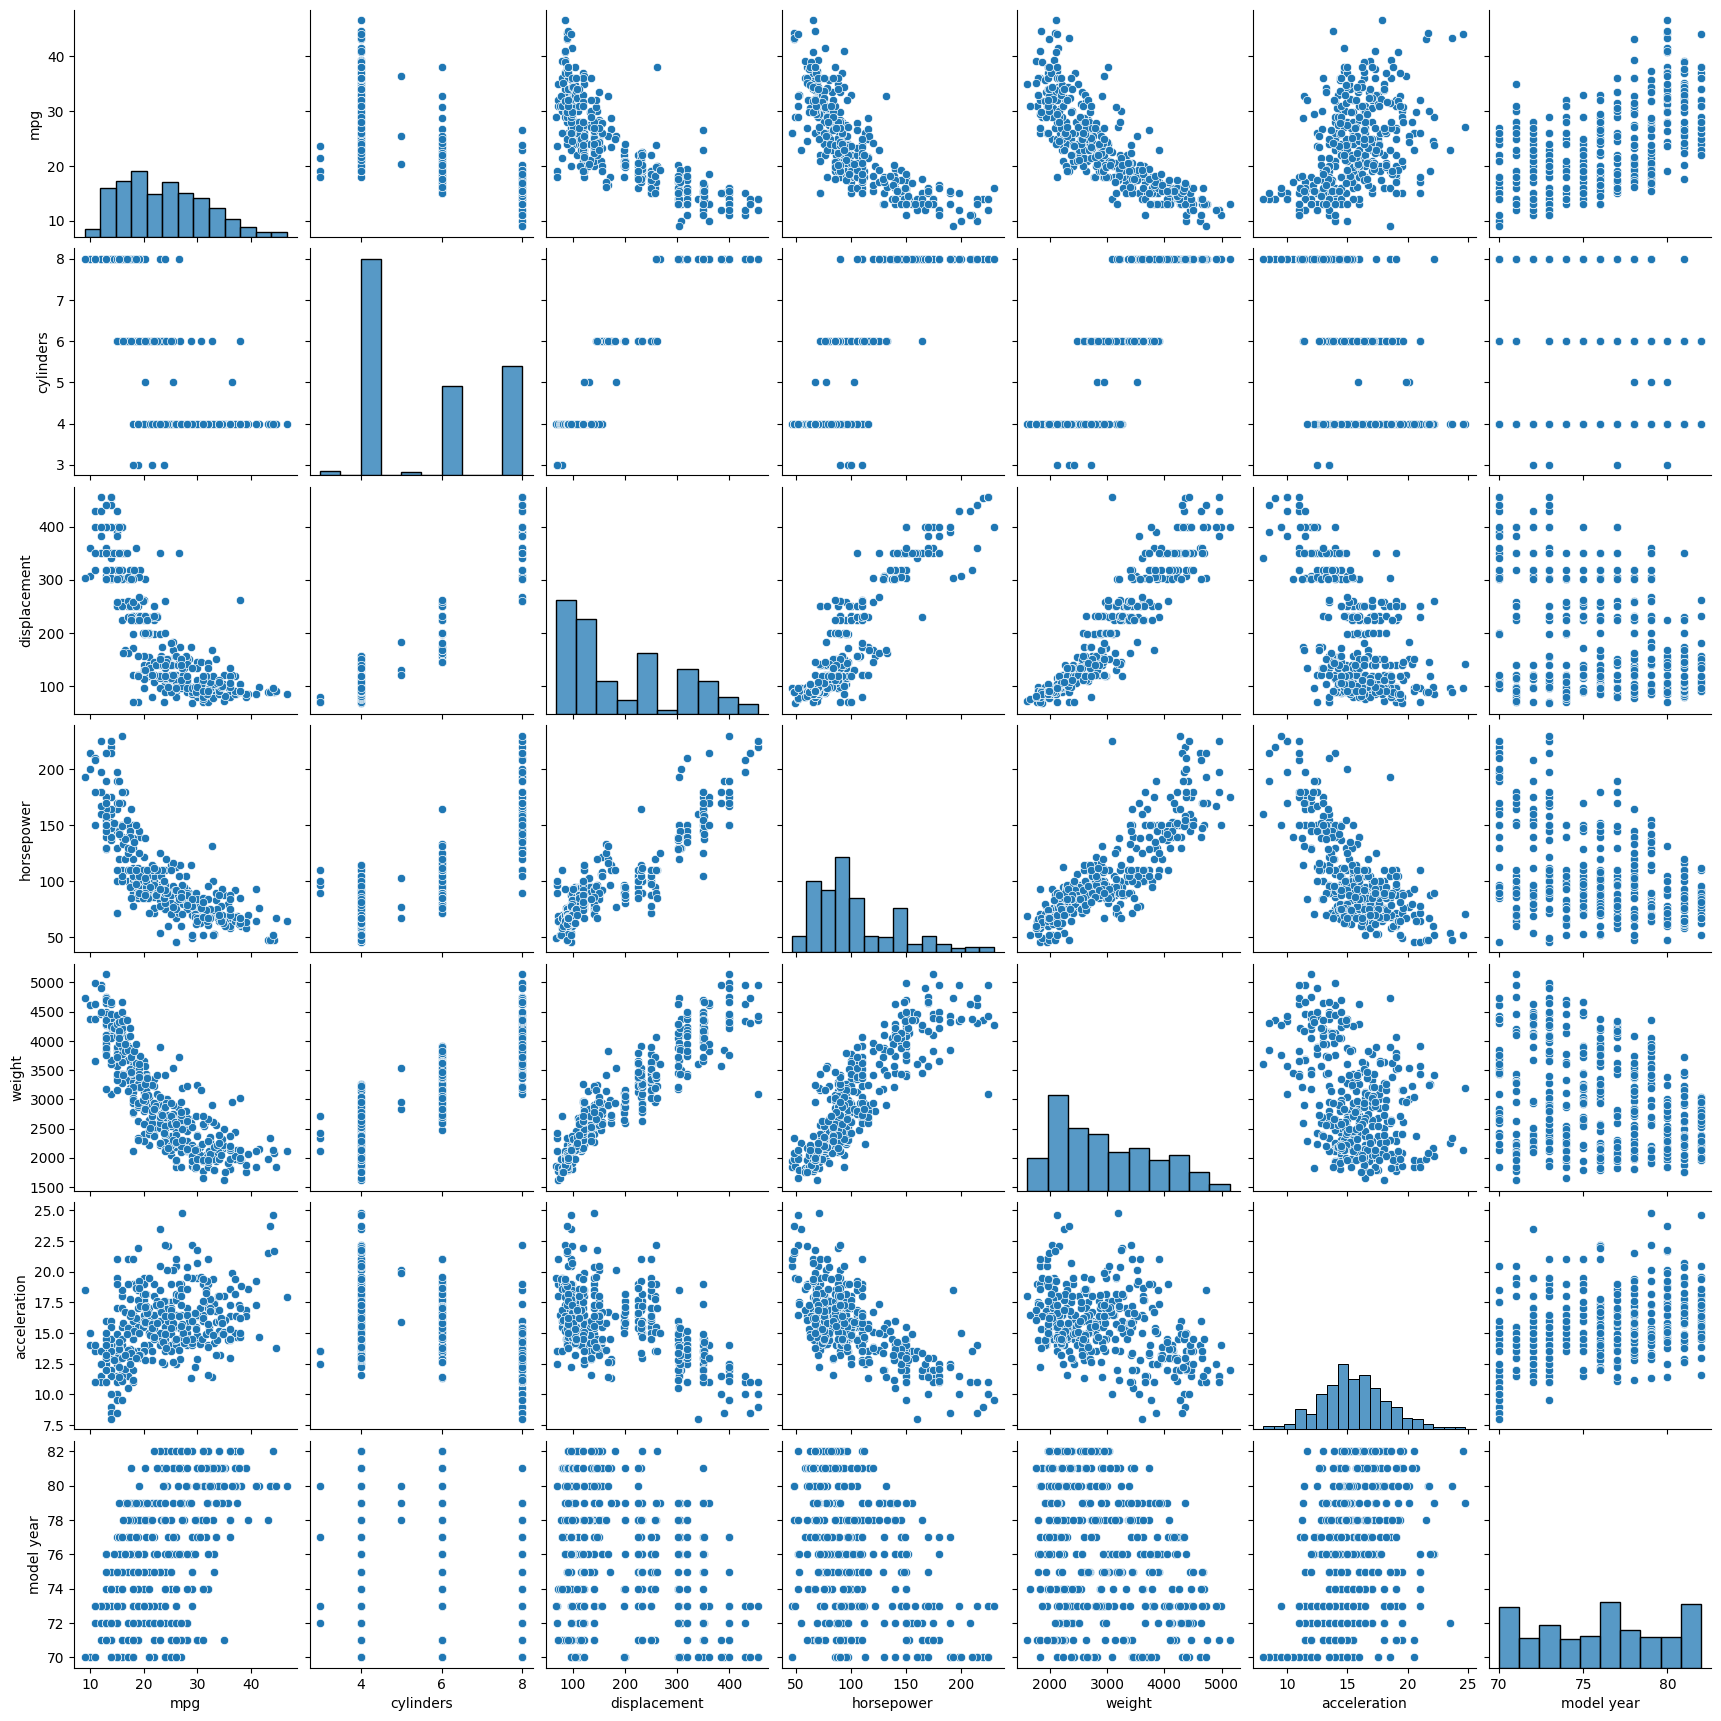

In [32]:
sns.pairplot(df_attr)

In [33]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_europe,origin_japan
mpg,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267,0.259022,0.442174
cylinders,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746,-0.352861,-0.396479
displacement,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164,-0.373886,-0.433505
horsepower,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733,-0.282877,-0.318972
weight,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564,-0.298843,-0.440817
acceleration,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137,0.204473,0.109144
model year,0.579267,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000,-0.024489,0.193101
origin_europe,0.259022,-0.352861,-0.373886,-0.282877,-0.298843,0.204473,-0.024489,1.000000,-0.229895
origin_japan,0.442174,-0.396479,-0.433505,-0.318972,-0.440817,0.109144,0.193101,-0.229895,1.000000


<Axes: >

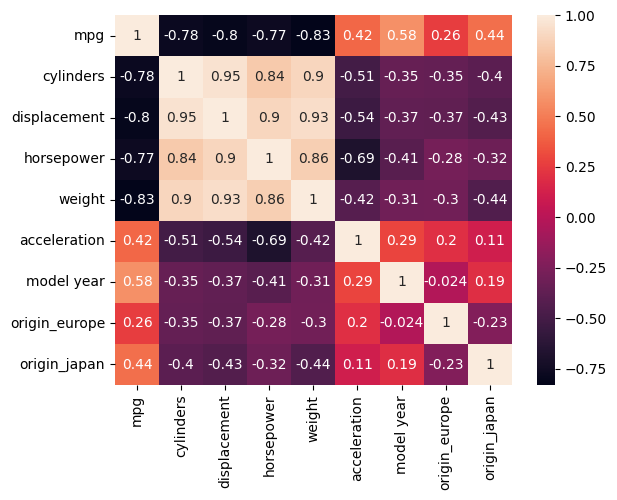

In [34]:
sns.heatmap(df.corr(),annot=True)

In [35]:
#separates the target variable (mpg) from the feature set (X)
y = df['mpg']
X = df.drop('mpg', axis =1)

In [55]:
X

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_europe,origin_japan
0,8,307.0,130.0,3504,12.0,70,False,False
1,8,350.0,165.0,3693,11.5,70,False,False
2,8,318.0,150.0,3436,11.0,70,False,False
3,8,304.0,150.0,3433,12.0,70,False,False
4,8,302.0,140.0,3449,10.5,70,False,False
...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,False,False
394,4,97.0,52.0,2130,24.6,82,True,False
395,4,135.0,84.0,2295,11.6,82,False,False
396,4,120.0,79.0,2625,18.6,82,False,False


In [36]:
from sklearn.model_selection import train_test_split

In [37]:
#splits the dataset into training (70%) and testing (30%) sets, ensuring reproducibility using random_state=1
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
reg_model = LinearRegression()

In [40]:
reg_model.fit(X_train, y_train)

LinearRegression()

In [41]:
reg_model.coef_

array([-0.39480797,  0.02894551, -0.02175221, -0.00735203,  0.06191937,
        0.83693389,  3.001283  ,  2.39526504])

In [42]:
for idx, col_name in enumerate(X_train.columns):
  print('This is the co-efficient for {} is {}'.format(col_name, reg_model.coef_[idx]))

This is the co-efficient for cylinders is -0.394807966164831
This is the co-efficient for displacement is 0.028945510765487514
This is the co-efficient for horsepower is -0.021752207723547485
This is the co-efficient for weight is -0.007352032065147344
This is the co-efficient for acceleration is 0.06191936600761696
This is the co-efficient for model year is 0.8369338917645006
This is the co-efficient for origin_europe is 3.001283000918514
This is the co-efficient for origin_japan is 2.395265036593774


In [43]:
reg_model.intercept_

-21.28473411729063

In [44]:
predictions = reg_model.predict(X_test)

In [45]:
predictions

array([20.91554528, 27.78619415, 20.35450492, 26.7530043 , 24.34440311,
       15.94627895, 29.61711144, 34.54999717, 17.08487642, 10.56570744,
       30.27190054, 16.46101954, 22.34949158, 27.36817515, 36.4916326 ,
       23.52414572, 10.95688403, 20.15994355,  9.06847316, 33.03329847,
       25.97760019, 32.32715763, 20.84295791, 25.08512814, 25.67024575,
       30.00444827, 32.58061387, 32.5462297 , 15.1314045 , 30.17173763,
       27.18513498, 11.04447745, 21.28330056, 28.68243423, 24.88266353,
       13.63888896, 26.37838591,  9.21013918, 31.6904227 , 23.85386165,
       23.89949396, 24.41984635, 21.05348912, 34.13688229, 25.91853825,
       22.15815042, 21.15554401, 11.6783042 , 28.50708814, 19.00196555,
       24.24819425, 26.62821232, 17.07117894, 12.10403757, 28.34022188,
       24.82823055, 10.32835574, 13.09624022, 30.49807412, 35.81856922,
       36.58585421, 35.86191278, 17.92313015, 27.49879047, 20.67007774,
       33.42297856, 26.59143064, 26.57457423, 29.67371196, 12.34

In [46]:
reg_model.predict(np.array([6,171,97,2984,14.5,75,0,0]).reshape(1,-1))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([20.91554528])

In [58]:
feature_names = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin_europe', 'origin_japan']

# Input data as a numpy array
input_data = np.array([6, 171, 97, 2984, 14.5, 75, 0, 0]).reshape(1, -1)

# Convert the input to a DataFrame with matching feature names
input_df = pd.DataFrame(input_data, columns=feature_names)

# Make prediction
y_pred = reg_model.predict(input_df)
print(y_pred)


[20.91554528]


In [47]:
reg_model.score(X_test, y_test)

0.8433135132808829

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [49]:
MAE = mean_absolute_error(y_test,predictions )

In [50]:
MAE

2.3542812072204016

In [51]:
MSE = mean_squared_error(y_test,predictions )

In [52]:
MSE

9.160979678961564

In [53]:
RMSE = np.sqrt(MAE)

In [54]:
RMSE

1.5343667121064644